## CSE428 Week 3 Coding Assignment

In [1]:
NAME = "Minhajul Abedin"
ID = "18301224"
COLLABORATORS_ID = ["", ""]

This assignment contains 4 tasks. Complete the notebook with proper codes for the lines with `# TO-BE-COMPLETED` tag, or by *uncommenting* a partially written codes where necessary.

Background: We larned in class that linear spatial filtering is basically a signal correlation opration between an image and a filter kernel. To filter an ```image``` with a ```kernel``` all we need to do is call the ```signal.correlate``` function from the ```scipy``` library.

```
filtered_image = signal.correlate(image, kernel, mode='same', method='auto')
```
Here, ```mode="same"``` takes care of the image padding under the hood; making the filtered image the *same shape* as the input image, while ```mode="valid"``` *shrinks the filtered image*. The ```method='direct'``` implements the correlation from the definition of signal correlation:

> $g(x, y)=\sum_{s,t}{w(s, t)}f(x+s, y+t)$

whereas ```method='fft'``` uses a frequency domain implementation which we will learn next week. The ```method='auto'``` chooses the faster implementation automatically. <br>
(Except for **Task 1**, always use ```method='auto'``` while using the correlation function )


 

We use the following code stucture to measure the excecution time of some python code:

```
import time

start_time = time.clock()

# some python code

print("Time elapsed: ", time.clock() - start_time, "seconds")
```


## **Task 0: The Imports** <br>
### Import the necessary libraries and define the helper functions. You can use the helper functions from the coding tutorials, or you can even use your own version of helper functions. <br>


In [2]:
# Import libraries 

import numpy as np
from skimage.io import imread
from skimage import exposure
from skimage import img_as_float
from skimage.color import rgb2gray
from skimage.util import random_noise
from skimage import img_as_float
from scipy import signal
import matplotlib.pyplot as plt

In [3]:
# Define helper functions

def plot_image(img,figsize=(5,5)):
    plt.figure(figsize=figsize)
    if len(img.shape)==2:
        plt.imshow(img, cmap="gray")
    else:
        plt.imshow(img)
    plt.axis("off")
    plt.show()
    print("Image shape: ", img.shape)

def plot_kernel(kernel, cmap="Reds"):
    plt.imshow(kernel, interpolation='none', cmap="Reds")
    plt.colorbar()
    plt.show()
    print("Kernel shape: ", kernel.shape)

def gaussian_kernel(width=1, size=10):
    gaussian1dkernel = signal.gaussian(size, width).reshape(size, 1)
    kernel = np.outer(gaussian1dkernel, gaussian1dkernel)
    return kernel/np.sum(kernel)

def box_kernel(size=5):
    return np.ones((size, size))/size**2

def assymmetric_kernel(width = 1, size=10):
  kernel_asymmetric = gaussian_kernel(width, size)
  while is_symmetric(kernel_asymmetric):
    np.random.shuffle(kernel_asymmetric)
  return kernel_asymmetric
    
def is_symmetric(kernel):
  # return np.array_equal(kernel, np.rot90(kernel, 2),equal_nan=True )
  return (kernel == np.rot90(kernel, 2)).all()

def plot_hist_cdf_color(I, nbins = 256,  normalize = False,hsb = False, plot_cdf=False, w_cdf = False):
  colors  = ['red', 'green', 'blue']
  t = 'RGB'
  labels = ['Red channel','Green channel', 'Blue channel']
  Ic = I.copy()
  if hsb:
    labels = ['Hue channel','Saturation channel', 'Value channel']
    Ic = color.rgb2hsv(Ic)
    t= 'HSV'
    # plt.ylim([0, ])
    
  xmax = 1 if I.max() <= 1 else 255
  plt.xlim([0,xmax])
  plt.autoscale(axis='y')
  for i in range(3):
    if plot_cdf:
      cdf, bins_cdf = exposure.cumulative_distribution(Ic[:,:,i].ravel(), nbins = 256)
      plt.plot(bins_cdf, cdf, lw = 2,color = colors[i])
      plt.ylabel('Percentage')
    else:
      hist, bins_hist = exposure.histogram(Ic[:,:,i].ravel(), nbins = nbins, normalize=normalize)
      plt.plot(bins_hist, hist, colors[i])
      if normalize:
        plt.ylabel('Probability')
      else:
         plt.ylabel('Count')
      if w_cdf:
        plt.twinx()
        cdf, bins_cdf = exposure.cumulative_distribution(Ic[:,:,i].ravel(), nbins = 256)
        plt.plot(bins_cdf, cdf, lw = 2,color = "dark"+colors[i])
        plt.ylabel('Percentage')
  plt.xlabel('Pixel values')
  plt.title(t+" Histogram")
  plt.legend(labels)



## **Task 1: Execution Time** <br>
### Excecution time comparison for the 2 different methods of the correlation function <br>


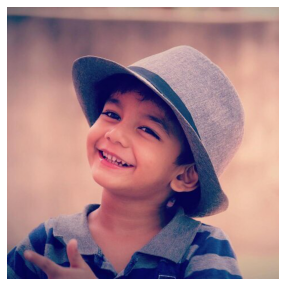

Image shape:  (478, 478, 3)


In [4]:
# Import an image taken by you, make sure it's dimensions does not exceed (512, 512). Downsample if necessary.

image = imread('sample.jpeg')
plot_image(image)

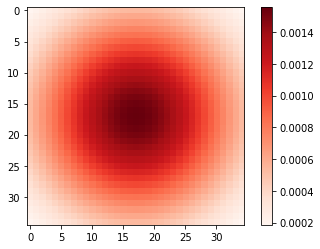

Kernel shape:  (35, 35)


In [5]:
# Define a gaussian kernel of size (35, 35)
k = 35
spread = 35/3
kernel = gaussian_kernel(spread, k)
plot_kernel(kernel)

In [6]:
# Determine the time to filter the image with the kernel using "direct" method

import time
 
start_time = time.process_time()
filetred_image_direct = np.zeros_like(image)
for i in range(image.shape[-1]):
  filetred_image_direct[:,:,i] = signal.correlate(image[:,:,i], kernel, mode='same', method='direct') 
 
print("Time elapsed using direct method of correlation: ", time.process_time() - start_time, "seconds")

Time elapsed using direct method of correlation:  13.375541363 seconds


In [7]:
# Determine the time to filter the image with the kernel using "fft" method
 
start_time = time.process_time()

filetred_image_fft = np.zeros_like(image)
for i in range(image.shape[-1]):
  filetred_image_fft[:,:,i] = signal.correlate(image[:,:,i], kernel, mode='same', method='fft') 
 
print("Time elapsed using fft method of correlation: ", time.process_time() - start_time, "seconds")

Time elapsed using fft method of correlation:  0.06714166799999788 seconds


### **Answer to Task 1** <br>

### Write your answer here. Comment on the results.

Execution time using direct method is 13.3755 $\approx$ 13.38 seconds while execution time using fft method is 0.067141$\approx$ 0.067 seconds. Execution time for fft method is too much less than direct method which mean fft method is very fast. To explain, in direct method the correlation is determined directly from sums. On the other hand, in fft the Fast Fourier Transform is used to perform the correlation more quickly.

(From here onwards, please use ```method="auto"``` while using any signal function.)

## **Task 2: Correlation Vs. Convolution** <br>
### Comparing the correlation and convolution operation for different kernels<br>


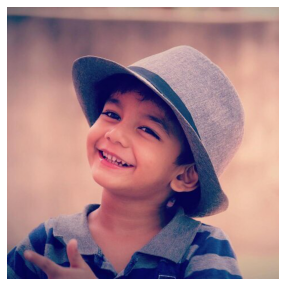

Image shape:  (478, 478, 3)


In [8]:
# Import an image taken by you, make sure it's dimensions does not exceed (512, 512). Downsample if necessary.

image = imread('sample.jpeg')
plot_image(image)

The kernel is symmetric:  True


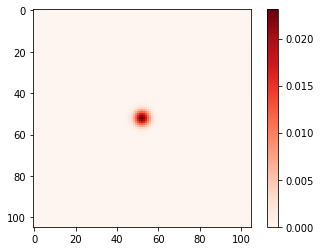

Kernel shape:  (105, 105)


In [9]:
# Define any symmetric kernel of size (105, 105)
k = 105
spread = 105/40
kernel_symmetric = gaussian_kernel(spread, k)
print("The kernel is symmetric: ", is_symmetric(kernel_symmetric))
plot_kernel(kernel_symmetric)

The kernel is asymmetric:  True


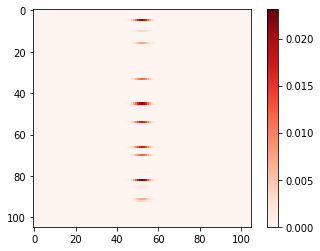

Kernel shape:  (105, 105)


In [10]:
# Define any asymmetric kernel of size (105, 105)

k = 105
spread = 105/40
kernel_asymmetric = assymmetric_kernel(spread, k)
print("The kernel is asymmetric: ", not is_symmetric(kernel_asymmetric))
plot_kernel(kernel_asymmetric)

In [11]:
# Filter the image with the symmetric kernel using the correlation function
filtered_image_symmetric_cor = np.zeros_like(image)
filtered_image_asymmetric_cor = np.zeros_like(image)

for i in range(image.shape[-1]):
  filtered_image_symmetric_cor[:,:,i] = signal.correlate(image[:,:,i], kernel_symmetric, mode='same', method='auto') 
  filtered_image_asymmetric_cor[:,:,i] = signal.correlate(image[:,:,i], kernel_asymmetric, mode='same', method='auto')

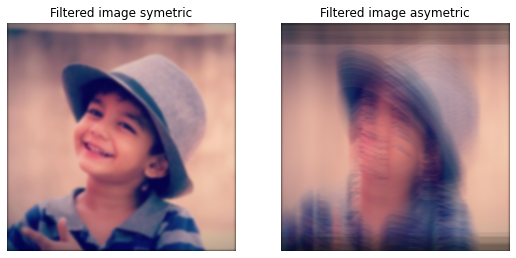

In [12]:
# Display the images side by side (with proper labeling, which is which)

plt.figure(figsize=(9,9))
plt.subplot(1,2,1)
plt.imshow(filtered_image_symmetric_cor)
plt.title("Filtered image symetric")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(filtered_image_asymmetric_cor)
plt.title("Filtered image asymetric")
plt.axis('off')
plt.show()

In [13]:
mse_symmetric_cor = np.sum((image - filtered_image_symmetric_cor) ** 2 ) / np.prod(image.shape)
mse_asymmetric_cor = np.sum((image - filtered_image_asymmetric_cor) ** 2 ) / np.prod(image.shape)

print("MSE of correlation using symmetric kernel: ", mse_symmetric_cor)
print("MSE of correlation using asymmetric kernel: ", mse_asymmetric_cor)

MSE of correlation using symmetric kernel:  27.085027106201455
MSE of correlation using asymmetric kernel:  73.18353145077992


### **Answer to Task 2.1** <br>

### Write your answer here. Compare the outputs.
**Answer**:
The correlation using symetric kernel result mean squared error is less then the mse of the result using asumetric kernel. The mse of symetric kernel result is 27.08 whereas for asymetric kernel it is 73.18. Also, in the symetric kernel the resultant image blur almost equivallently whereas in asymetric kernel result it looks like the resultant pixels are mores spread out.

Now, to *convolve* an ```image``` with a ```kernel``` all we need to do is call the ```signal.convolve``` function from the ```scipy``` library.

```
filtered_image = signal.convolve(image, kernel, mode='same', method='auto')```

The parameters work the same way as the ```signal.correlate```function.

In [14]:
# Filter the image with the asymmetric kernel using the convolution function
filtered_image_symmetric_conv = np.zeros_like(image)
filtered_image_asymmetric_conv = np.zeros_like(image)
for i in range(image.shape[-1]):
  filtered_image_symmetric_conv[:,:,i] = signal.convolve(image[:,:,i], kernel_symmetric, mode='same', method='auto') 
  filtered_image_asymmetric_conv[:,:,i] = signal.convolve(image[:,:,i], kernel_asymmetric, mode='same', method='auto') 

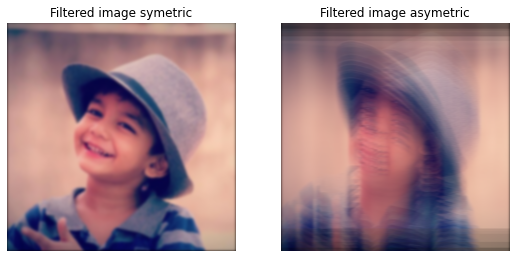

In [15]:
plt.figure(figsize=(9,9))
plt.subplot(1,2,1)
plt.imshow(filtered_image_symmetric_conv)
plt.title("Filtered image symetric")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(filtered_image_asymmetric_conv)
plt.title("Filtered image asymetric")
plt.axis('off')
plt.show()

In [16]:
mse_symmetric_conv = np.sum((image - filtered_image_symmetric_conv) ** 2 ) / np.prod(image.shape)
mse_asymmetric_conv = np.sum((image - filtered_image_asymmetric_conv) ** 2 ) / np.prod(image.shape)

print("MSE of convolution using symmetric kernel: ", mse_symmetric_conv)
print("MSE of convolution using asymmetric kernel: ", mse_asymmetric_conv)


MSE of convolution using symmetric kernel:  27.085027106201455
MSE of convolution using asymmetric kernel:  73.586032282348


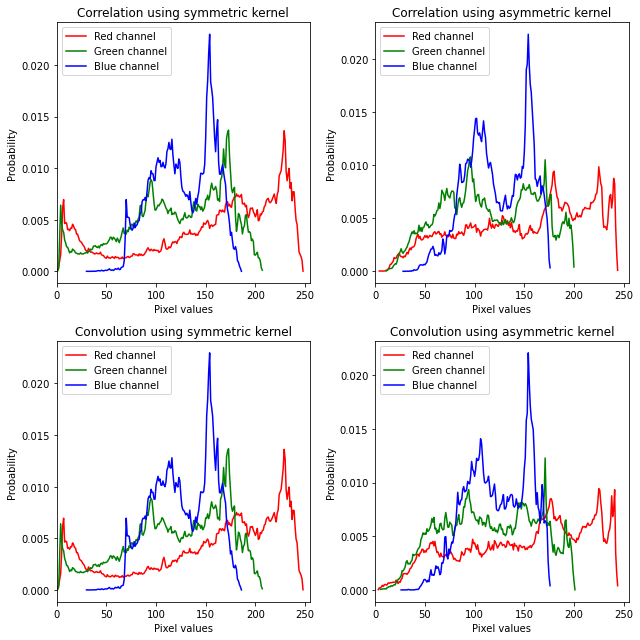

In [17]:
plt.figure(figsize=(9,9))
plt.subplot(2,2,1)
plot_hist_cdf_color(filtered_image_symmetric_cor,normalize=True)
plt.title("Correlation using symmetric kernel")

plt.subplot(2,2,2)
plot_hist_cdf_color(filtered_image_asymmetric_cor,normalize=True)
plt.title("Correlation using asymmetric kernel")

plt.subplot(2,2,3)
plot_hist_cdf_color(filtered_image_symmetric_conv,normalize=True)
plt.title("Convolution using symmetric kernel")

plt.subplot(2,2,4)
plot_hist_cdf_color(filtered_image_asymmetric_conv,normalize=True)
plt.title("Convolution using asymmetric kernel")

plt.tight_layout()
plt.show()

In [18]:
# check whether both arrays are equal
print('Both correlation and convolution result using symmetric kernel is same: ',(filtered_image_symmetric_cor == filtered_image_symmetric_conv).all())
print('Both correlation and convolution result using asymmetric kernel is same: ',(filtered_image_asymmetric_cor == filtered_image_asymmetric_conv).all())

# MSE
print('\nMSE of correlation using, Symmetric kernel: {}  Asymetric kernel: {}'.format(mse_symmetric_cor, mse_asymmetric_cor))
print('MSE of convolution using, Symmetric kernel: {}  Asymetric kernel: {}'.format(mse_symmetric_conv, mse_asymmetric_conv))


Both correlation and convolution result using symmetric kernel is same:  True
Both correlation and convolution result using asymmetric kernel is same:  False

MSE of correlation using, Symmetric kernel: 27.085027106201455  Asymetric kernel: 73.18353145077992
MSE of convolution using, Symmetric kernel: 27.085027106201455  Asymetric kernel: 73.586032282348


### **Answer to Task 2.2** <br>

### Write your answer here. Compare the outputs.
**Answer:** By examining both histogram and mse result, we can state that convolution and correlation both give the same result while applying symmetric kernel. Both mse of the result produced by symmetric kernel is same which is  approximately 27.085 for both. The result is equal because of the 180 rotation of the kernel does not produce any different result. On the other hand, in case of asymmentry though both result qualitatively look like same but there are quantitatively difference. We can see the difference in their histogram. Also, them mse of correlation using asymmetric kernel is 73.183531 $\approx$ 73.18 whereas after convolution with the same kernel mse is 73.586032\approx$ 73.58.

## **Task 3: Edge Pair Detector** <br>
### Try to come up with two 3 x 3 filter kernels which are able to detect ***only the parallel pair of edges*** in the following image<br>

![](https://drive.google.com/uc?export=view&id=1a1CXbuC8A2FbyFvZovJMXERUijpatecU)

[The image can be downloaded from here: https://drive.google.com/file/d/1a1CXbuC8A2FbyFvZovJMXERUijpatecU/view?usp=sharing]

*Hint: No mathematical derivation is necessary. Just try devising the kernels using the same intuitions used behind the horizontal and vertical edge detector kernels. Coming up with a filter kernel means to determine the 9 filter coefficients of the 3x3 filer kernel.*

(626, 626, 3)


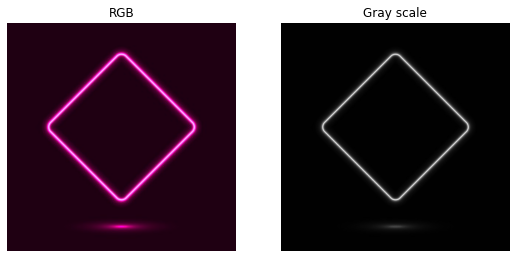

In [19]:
# Download the image from the drive link above and upload it to your current working directory in colab. Then load the image

image = imread('diamond2.jpg')
print(image.shape)
plt.figure(figsize = (9,9))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('RGB')
plt.axis('off')

image_gray = rgb2gray(image)
plt.subplot(1,2,2)
plt.imshow(image_gray, cmap='gray')
plt.title('Gray scale')
plt.axis('off')
plt.show()

In [20]:
# define the 2 custom kernels by replacing the "?"s with your values and uncomment the next few lines of code in this cell

kernel_1 = np.array([[2, 1, 0], 
                     [1, 0, -1], 
                     [0, -1, -2]]) 

kernel_2 = np.array([[0, -1, -2], 
                     [1, 0, -1], 
                     [2, 1, 0]]) 

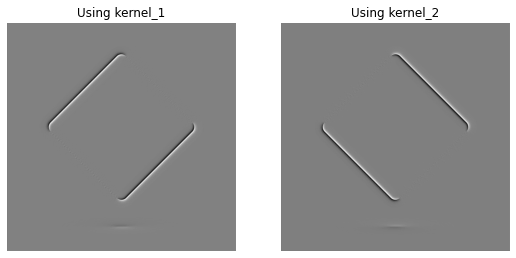

In [21]:
# detect the 2 parallel pair of edges and plot them side by side in a 1x2 grid subplot

# detect the first pair using image filtering with kernel_1

first_pair_detected= signal.correlate(image_gray, kernel_1, mode='same', method='auto')

# detect the second pair using image filtering with kernel_2
second_pair_detected  = signal.correlate(image_gray, kernel_2, mode='same', method='auto') 


# plot the two filtered images side by side

plt.figure(figsize=(9,9))
plt.subplot(1,2,1)
plt.imshow(first_pair_detected, cmap = 'gray')
plt.title("Using kernel_1")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(second_pair_detected, cmap='gray')
plt.title("Using kernel_2")
plt.axis('off')
plt.show()

### **Answer to Task 3** <br>

### Write your answer here. Which filters you came up with and why? How did you choose the coefficients? Are your kernels unique or there can be other kernels which can accomplish the same task?    

**Answer:**  Sobel filters for edge detection:
$$
Horizontal:
\begin{bmatrix}
-1 & -2 & -1\\
0 & 0 & 0\\
1 & 2 & 1
\end{bmatrix}\quad
Vertical:
\begin{bmatrix}
-1 & 0 & 1\\
-2 & 0 & 2\\
-1 & 0 & 1
\end{bmatrix}
$$ 
I have come with 2 filters by observing this filters:  
1. For left  slanted pairs:
$$\begin{bmatrix}
2 & 1 & 0\\
1 & 0 & -1\\
0 & -1 & -2
\end{bmatrix}$$ 
In this filter anti diagonally the value will be 0 and in other sides of diagonal the value is negative of each other. If we add up all values the value will become 0. So that, where the pixel of the image are in low frequency the result will come 0. For that we only take into count of the left side and right side of  the diagonal as we want to detect edge for the left slanted pairs. However, if we rotate only the corner value of the sobel filter to make it look like diagonal, we will get this filter.
2. For right  slanted pairs:
$$\begin{bmatrix}
0 & -1 & -2\\
1 & 0 & -1\\
2 & 1 & 0
\end{bmatrix}$$ 
The only difference is it is now diagonally 0 so that right slanted pairs can be detected.

This is not unique to detect edges like this, there can be other combination possible to get the result. Also, we can came up with different values. For example, the below kernel works as well, 
$$  
\begin{bmatrix}
1 & 1 & 0\\
1 & 0 & -1\\
0 & -1 & -1
\end{bmatrix}\quad
and\quad
\begin{bmatrix}
0 & -1 & -1\\
1 & 0 & -1\\
1 & 1 & 0
\end{bmatrix}
$$ 





## **Task 4: Image Denoising** <br>
### Take something.jpg image and corrupt it with *gaussian noise* of 0 mean and 0.2 variance. Denoise the image using:

1.   Total Variation Denoising (TVD)
2.   Bilateral Filtering (BF)

Feel free to experiment with the different filter parameters and try to come up with a cleaner image. Fianlly, comapre the MSE between the denoised images and the original uncorrupted image.

something.jpg can be downloaded from here: https://drive.google.com/file/d/1KgoZJDsTIW_NMh8LJ5oUneAQkIQsfzKT/view?usp=sharing


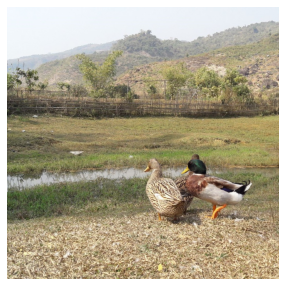

Image shape:  (1012, 1012, 3)


In [22]:
# Download the image from the drive link above and upload it to your current working directory in colab
# Then load the image "something.jpg"

image = img_as_float(imread('something.jpg'))
plot_image(image)

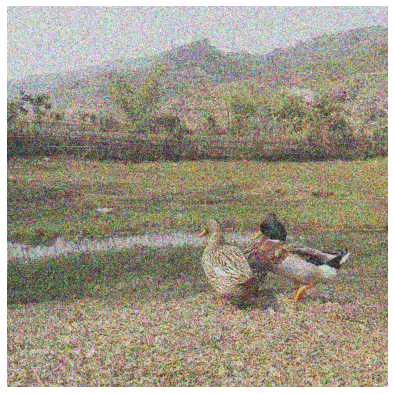

Image shape:  (1012, 1012, 3)


In [23]:
# corrupt the original image

image_noisy = random_noise(image, mode='gaussian', var=0.2)
plot_image(image_noisy, figsize=(7,7))

In [24]:
# import the bilateral filter
from skimage.restoration import denoise_bilateral

# import the total variation denoising filter
from skimage.restoration import denoise_tv_chambolle

In [25]:
# clean the image using TVD

image_denoised_tvd = denoise_tv_chambolle(image_noisy,
                                       weight=0.3, eps=0.000001, n_iter_max=1000, multichannel=True)

In [26]:
# clean the image using BF

image_denoised_bf = denoise_bilateral(image_noisy, win_size=7, 
                                           sigma_color=200, sigma_spatial=500, multichannel=True)

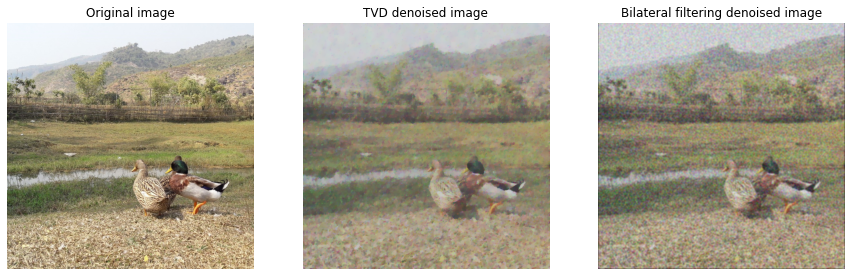

In [27]:
# plot image, image_denoised_tvd & image_denoised_bf side by side in a 1x3 grid subplot

fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1,3,1)
ax1.imshow(image) 
ax1.title.set_text('Original image')
ax1.axis("off")

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(image_denoised_tvd)
ax2.title.set_text('TVD denoised image')
ax2.axis("off")

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(image_denoised_bf)
ax3.title.set_text('Bilateral filtering denoised image')
ax3.axis("off")

plt.show()

In [28]:
# compute the MSE

mse_tvd = np.sum((image - image_denoised_tvd)**2)/np.prod(image.shape)
mse_bf = np.sum((image - image_denoised_bf)**2)/np.prod(image.shape) 
print('MSE TVD: ',mse_tvd)
print('MSE BF: ',mse_bf)

MSE TVD:  0.015259366040199774
MSE BF:  0.01710167407262085


### **Answer to Task 4** <br>

### Write your answer here. Briefly explain your findings both qualitatively (which one looks better) and quantitatively (which one has a better MSE). Which parameters did you tweak? How did that impact the end result?

**Answer:** Qualitatively the result of Total Variation Denoising (TVD) looks better than Bilateral Filtering (BF). Also, mean squared error of total variation denoising(TVD) is less than Bilateral filtering(BF). MSE of TVD result is  0.0152593 $\approx$ 0.015 whereas MSE of BF result is 0.0171016 $\approx$ 0.017. MSE of TVD result is 0.00185$\approx$ 0.002 less than mse of BF result. Therefore, TVD result is quantitavely better then BF.

## **The END**